<a href="https://colab.research.google.com/github/adityapentyala/em-assignment/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
# import statsmodels.api as sm
from sklearn.utils import resample

def evaluate_model(y_true, y_pred):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    evaluation_metrics = {
        'Confusion_Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    return evaluation_metrics


def logistic_regression_model(df, dep_variable, test_size=0.2, random_state=42, n_bootstrap=100):
    X = df.drop(columns=[dep_variable])
    y = df[dep_variable]

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the logistic regression model
    logistic_regression_model = LogisticRegression(max_iter = 1000, solver = "saga")
    logistic_regression_model.fit(X_train, y_train)
    y_pred = logistic_regression_model.predict(X_test)
    evaluation_metrics = evaluate_model(y_test, y_pred)

    # Get coefficients
    coefficients = logistic_regression_model.coef_

    # Perform bootstrapping to estimate variance of coefficients
    coef_bootstraps = []
    for _ in range(n_bootstrap):
        X_boot, y_boot = resample(X_train, y_train, random_state=random_state)
        model = LogisticRegression()
        model.fit(X_boot, y_boot)
        coef_bootstraps.append(model.coef_)
    variance_coefficients = np.var(coef_bootstraps, axis=0)

    # # Perform t-test for coefficients
    # X_train = sm.add_constant(X_train)  # Add constant for intercept
    # model = sm.Logit(y_train, X_train)
    # result = model.fit(disp=0)  # Fit logistic regression model
    # t_test_results = result.t_test()

    return logistic_regression_model, evaluation_metrics, coefficients, variance_coefficients



# df = pd.read_csv('/content/final_processed_data.csv')

# regression_model_child, evaluation_metrics_child, coefficients_child, variance_coefficients_child, t_test_results_child=logistic_regression_model(df,"Child is alive")
# regression_model_PrenatalCare, evaluation_metrics_PrenatalCare, coefficients_PrenatalCare, variance_coefficients_PrenatalCare, t_test_results_PrenatalCare=logistic_regression_model(df,"PrenatalCare")
# regression_model_Hospital,evaluation_metrics_Hospital, coefficients_Hospital, variance_coefficients_Hospital, t_test_results_Hospital=logistic_regression_model(df,"Hospital delivery")


In [ ]:
df = pd.read_csv('/content/hiii.csv')

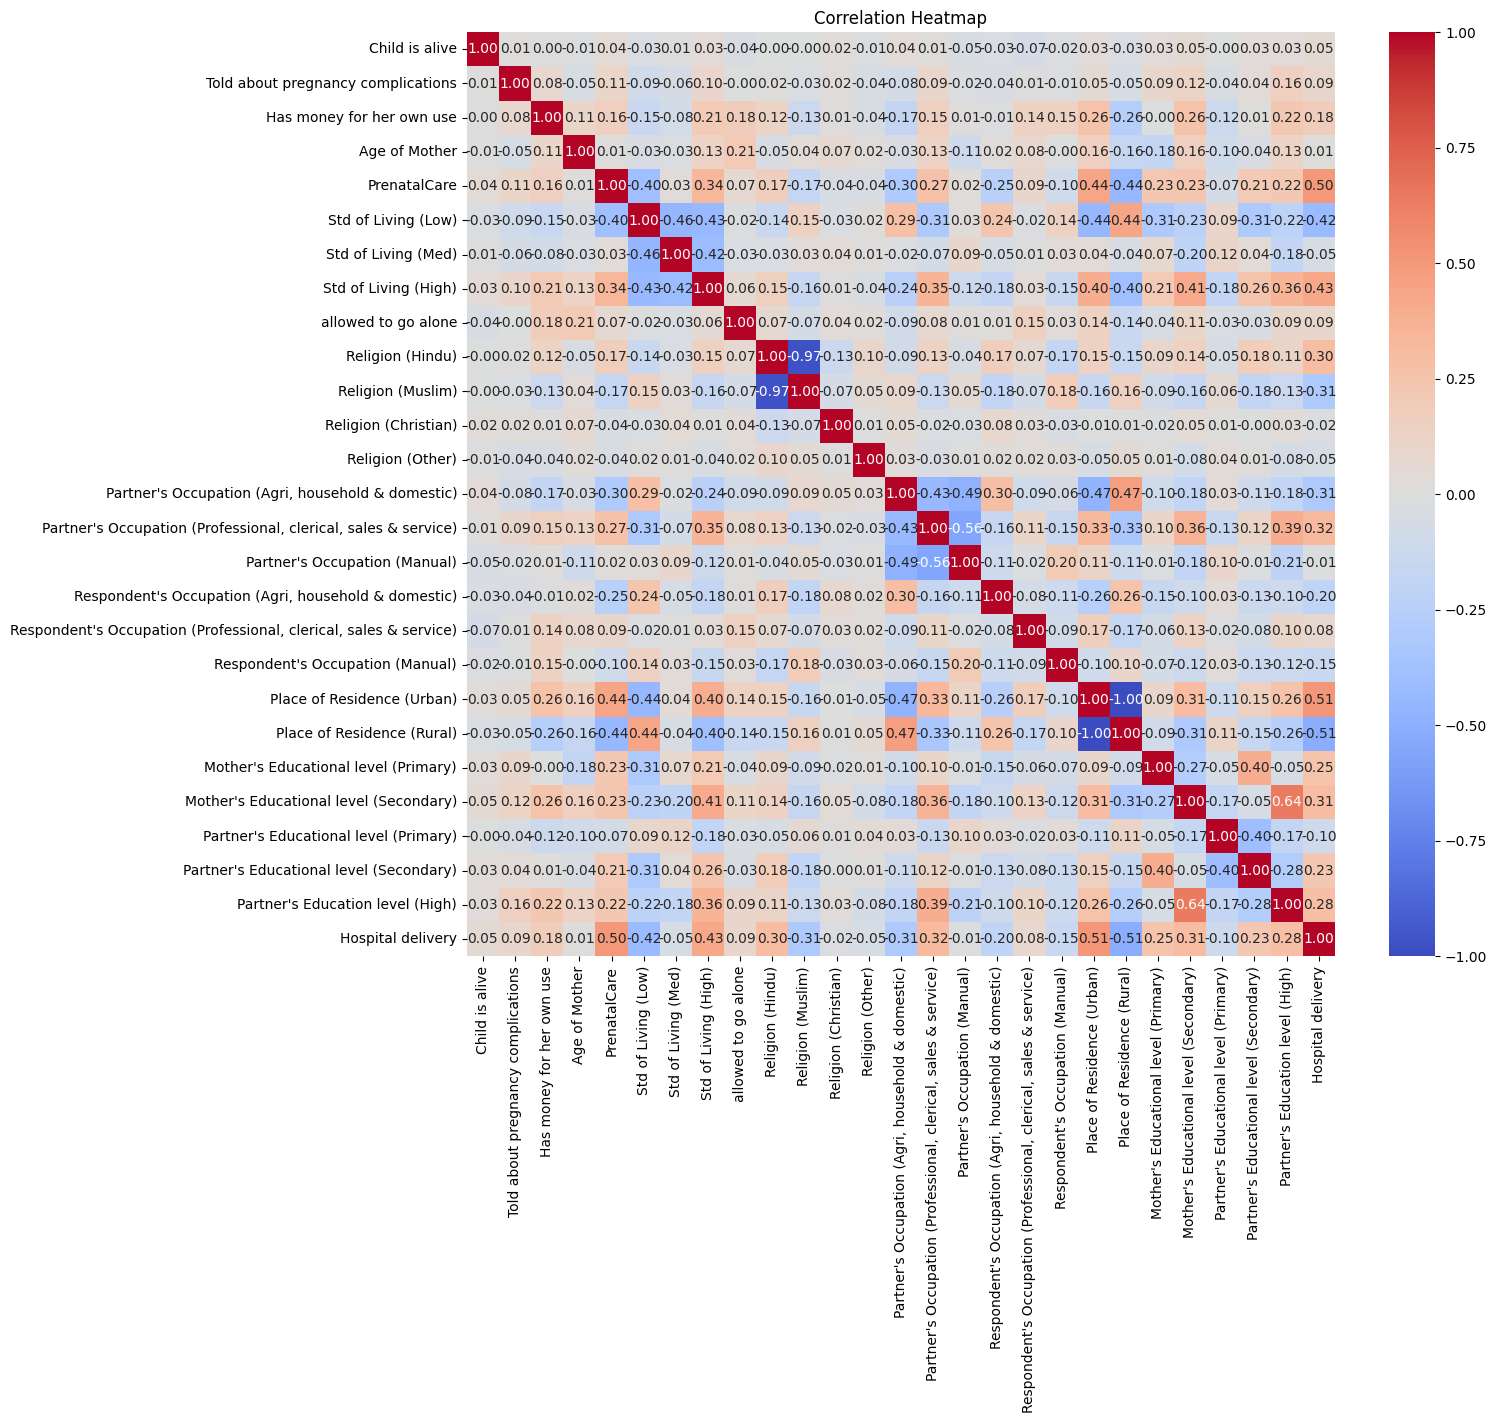

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df):
    plt.figure(figsize=(14, 12))  # Adjust the figsize as needed
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

# Assuming df is your DataFrame
plot_heatmap(df)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 27 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Child is alive                                                     1823 non-null   int64  
 1   Told about pregnancy complications                                 1699 non-null   float64
 2   Has money for her own use                                          1823 non-null   int64  
 3   Age of Mother                                                      1823 non-null   int64  
 4   PrenatalCare                                                       1823 non-null   int64  
 5   Std of Living (Low)                                                1823 non-null   int64  
 6   Std of Living (Med)                                                1823 non-null   int64  
 7   Std of Living (High)    

In [ ]:
# Dropping specified columns
df.drop(columns=["Std of Living (Low)", "Religion (Hindu)", "Place of Residence (Rural)"], inplace=True)

# Filling missing values with a specified value, e.g., 0
df.fillna(value=0, inplace=True)


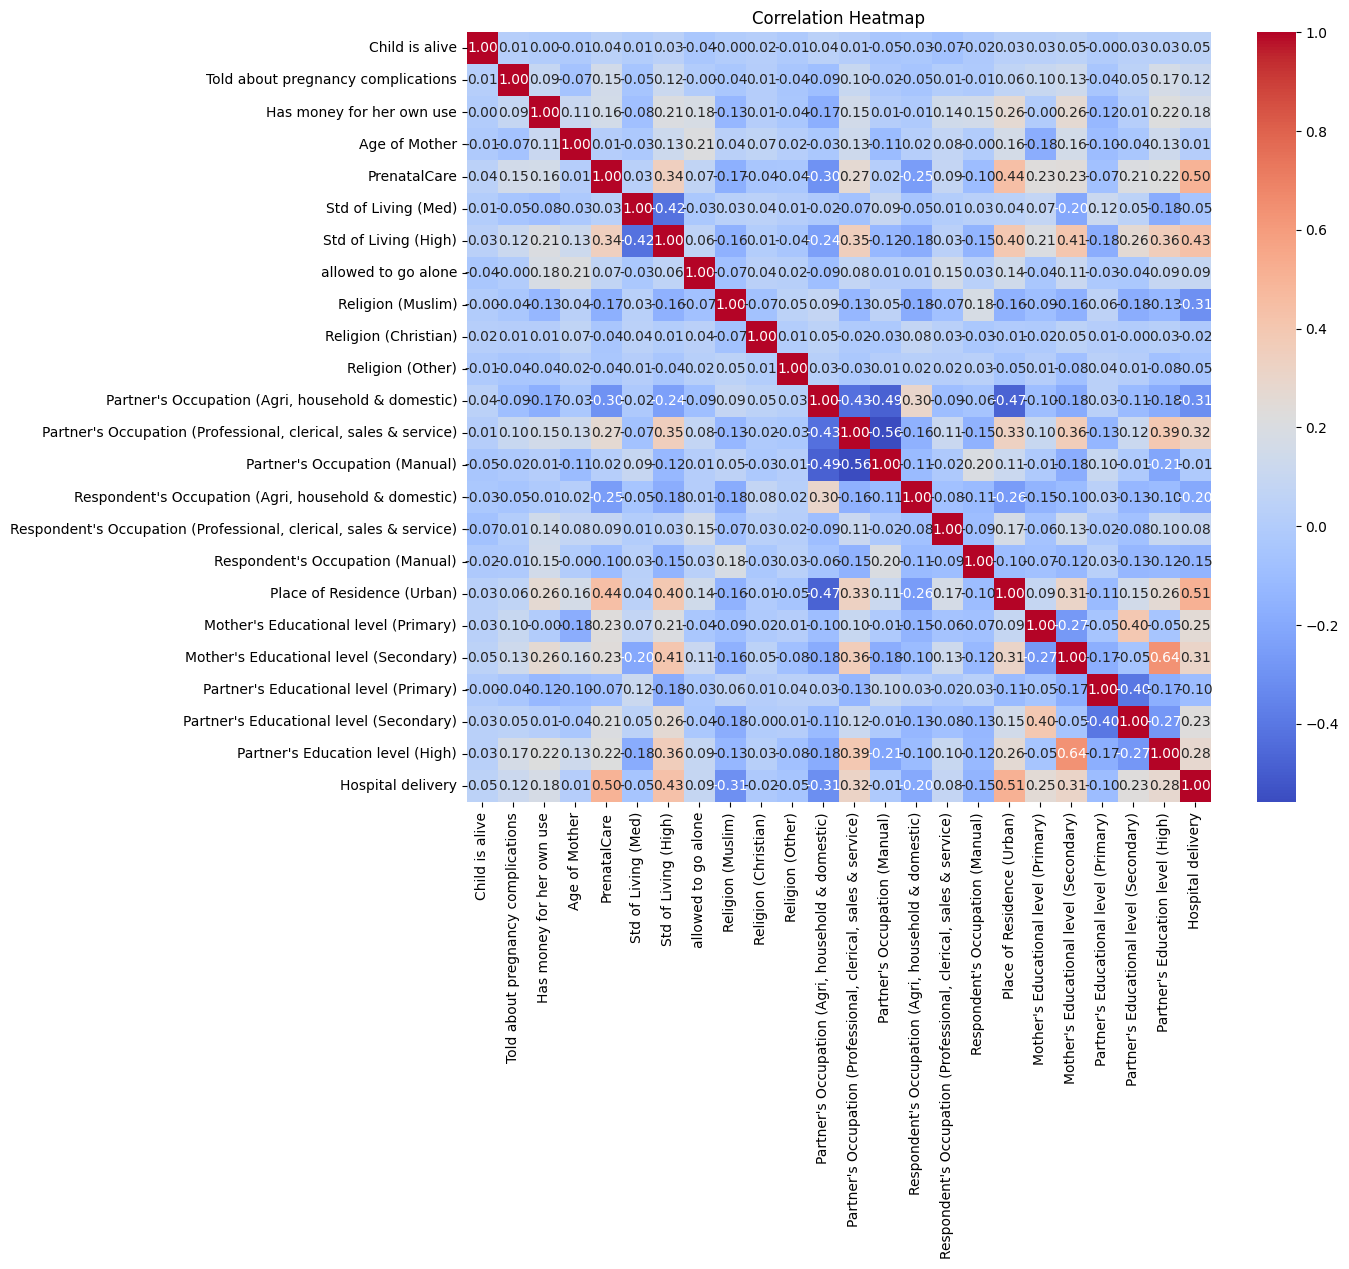

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df):
    plt.figure(figsize=(12, 10))  # Adjust the figsize as needed
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

# Assuming df is your DataFrame
plot_heatmap(df)


In [ ]:

regression_model_child, evaluation_metrics_child, coefficients_child, variance_coefficients_child = logistic_regression_model(df,"Child is alive")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/

In [ ]:
#code for tabulate
coefficients_child = pd.DataFrame(coefficients_child)
variance_coefficients_child = pd.DataFrame(variance_coefficients_child)
standard_error_child = np.sqrt(variance_coefficients_child)

combined_df = pd.concat([coefficients_child, variance_coefficients_child, standard_error_child], axis = 0)


rows = ["Coefficients", "Variance", "Standard Error"]

#combined_df = pd.concat([combined_df, columns], axis = 1)
#combined_df.columns = df.columns
combined_df.index = rows
# intercept_values = [1.14, 0, 0]
combined_df["Intercept"] = [1.14, 0, 0]

columns = df.columns.tolist()
columns.remove("Child is alive")
columns.append("Intercept")

combined_df.columns = columns
#combined_df = pd.concat([columns, combined_df], axis = 0)



combined_df.T

,Coefficients,Variance,Standard Error
Told about pregnancy complications,0.099568,0.000000e+00,0.000000e+00
Has money for her own use,0.352558,7.888609e-31,8.881784e-16
Age of Mother,-0.004847,1.925930e-32,1.387779e-16
PrenatalCare,0.259869,1.925930e-34,1.387779e-17
Std of Living (Med),0.171103,4.930381e-32,2.220446e-16
Std of Living (High),-0.032883,3.774823e-32,1.942890e-16
allowed to go alone,-0.127457,9.321501e-32,3.053113e-16
Religion (Muslim),0.155934,9.984021e-31,9.992007e-16
Religion (Christian),0.161070,4.930381e-32,2.220446e-16
Religion (Other),0.923511,3.081488e-31,5.551115e-16


In [ ]:
dataframe = [["CONFUSION MATRIX", "Actual 1", "Actual 0"],["Predicted 1","0" ,"10"],["Predicted 0", "0","330"]]
ddf=pd.DataFrame(dataframe)
ddf

,0,1,2
0,CONFUSION MATRIX,Actual 1,Actual 0
1,Predicted 1,0,10
2,Predicted 0,0,330


In [ ]:
print(evaluation_metrics_child)

{'Confusion_Matrix': array([[  0,  12],
       [  0, 353]]), 'Accuracy': 0.9671232876712329, 'Precision': 0.9353274535560142, 'Recall': 0.9671232876712329, 'F1-Score': 0.9509596672644713}


In [ ]:
for k,v in evaluation_metrics_child.items():
  print(k, ":", v)
  print()

Confusion_Matrix : [[  0  12]
 [  0 353]]

Accuracy : 0.9671232876712329

Precision : 0.9353274535560142

Recall : 0.9671232876712329

F1-Score : 0.9509596672644713

